In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
def show(img, title="Image"):
    plt.figure(figsize=(4,4))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [18]:
DATASET_PATH = "Sea-Animal-Image-Dataset"

classes = os.listdir(DATASET_PATH)
print("Classes found:", classes)
print("Total classes:", len(classes))

for c in classes:
    path = os.path.join(DATASET_PATH, c)
    print(f"{c}: {len(os.listdir(path))} images")

Classes found: ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly_Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']
Total classes: 23
Clams: 497 images
Corals: 500 images
Crabs: 499 images
Dolphin: 782 images
Eel: 497 images
Fish: 494 images
Jelly_Fish: 845 images
Lobster: 499 images
Nudibranchs: 500 images
Octopus: 562 images
Otter: 500 images
Penguin: 482 images
Puffers: 531 images
Sea Rays: 517 images
Sea Urchins: 579 images
Seahorse: 478 images
Seal: 414 images
Sharks: 590 images
Shrimp: 488 images
Squid: 483 images
Starfish: 499 images
Turtle_Tortoise: 1903 images
Whale: 572 images


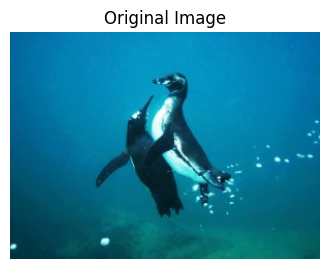

In [19]:
img_path = "Sea-Animal-Image-Dataset/Penguin/3671943067_be63220c07_o.jpg"
img = cv2.imread(img_path)
show(img, "Original Image")


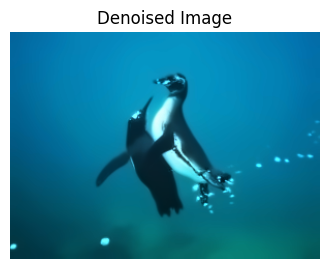

In [20]:
def denoise_image(img):
    denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    return denoised

denoised = denoise_image(img)
show(denoised, "Denoised Image")


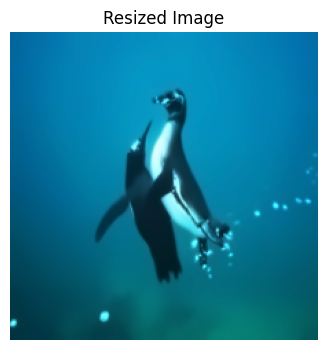

In [21]:
def resize_image(denoised, size=(224, 224)):
    resized = cv2.resize(denoised, size)
    return resized

resized = resize_image(denoised)
show(resized, "Resized Image")


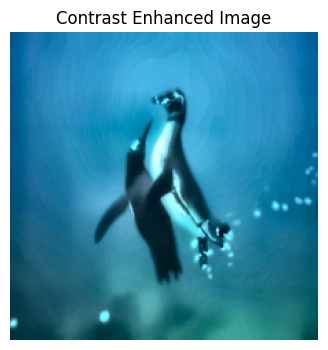

In [22]:
def enhance_contrast(resized):
    lab = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return enhanced

enhanced = enhance_contrast(resized)
show(enhanced, "Contrast Enhanced Image")


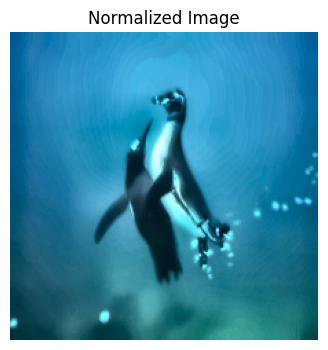

In [23]:
def normalize(enhanced):
    img_normalized = enhanced.astype(np.float32) / 255.0
    return img_normalized

normalized = normalize(enhanced)
show((normalized * 255).astype(np.uint8), "Normalized Image")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.93333334..2.4941177].


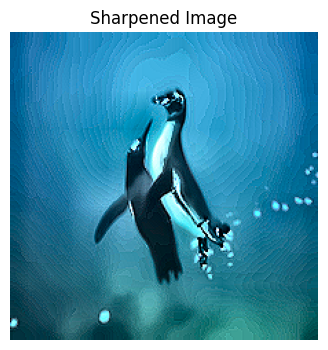

In [24]:
def sharpen(normalized):
    kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])
    sharp = cv2.filter2D(normalized, -1, kernel)
    return sharp

sharpened = sharpen(normalized)
show(sharpened, "Sharpened Image")
